# 경사하강법

텐서플로는 다양한 최적화 방식들을 메소드로 구현되어있습니다. 덕분에 덕분에 신경망을 구현할 때 백프로퍼게이션 과정을 쉽게 적용 가능합니다.

경사하강법의 주요 목적은 그래프의 결과를 원하는 결과가 나오도록 유도하는 일입니다. 자세한 방법이나 이론은 생략하겠습니다.

경사하강법을 사용하기 위해서는 그래프에서 나온 실행 결과와 원하는 결과가 얼마나 차이가 나는지를 나타내는 척도가 필요합니다. 이를 Loss함수를 통해 나타낼 수 있습니다. 텐서플로에 최적화 함수들은 이 Loss 함수가 최소화하는 방향(혹은 최대화하는 방향)으로 각 변수들을 이동시켜주는 역할을 합니다.

예제에서는 가장 대표적으로 사용되는 제곱평균을 사용해 Loss 함수를 만들겠습니다.

In [1]:
%matplotlib inline

import tensorflow as tf
import numpy as np

import matplotlib.pyplot as plt

/Users/skim0119/Desktop/Project/ML_Library_Notes/venv/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


$$
\text{Loss} = \sqrt{\frac{1}{n}\sum_i^n x_i^2}
$$

텐서플로 안에서는 reduced_mean과 square 함수를 지원하고있습니다.

임의의 랜덤한 3x3 텐서 값을 항등행렬(eye)가 되도록 유도해보겠습니다.

x는 랜덤 정규분포를 이용해 초기화된 3x3 텐서변수입니다. 이 변수를 I가 되는 방향으로 경사하강법을 이용해 보겠습니다.

우선 초기화된 x 텐서를 출력한 후, 총 1000번의 최적화 과정을 거친 다음 결과 텐서를 출력해보겠습니다.

In [2]:
tf.reset_default_graph()

x = tf.Variable(tf.truncated_normal((3,3)))
x_target = tf.eye(3)
loss = tf.reduce_mean(tf.square(x_target - x))
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.1).minimize(loss)

sess = tf.Session()
sess.run(tf.global_variables_initializer())
print(sess.run(x))
for i in range(1000):
    sess.run(optimizer)

print(sess.run(x))
    
sess.close()

[[-0.04323453 -1.1635168   0.2993337 ]
 [-1.2488698   1.478091   -1.2558987 ]
 [ 0.5245323   0.29885212 -0.70316267]]
[[ 9.9999869e-01 -2.0227159e-10  5.2037704e-11]
 [-2.1711005e-10  1.0000026e+00 -2.1833195e-10]
 [ 9.1187523e-11  5.1953986e-11  9.9999869e-01]]


위와같이 최적화 메소드는 그래프 안에 변수를 우리가 원하는 결과가 나오는 방향으로 변경해주는 역할을 합니다. 그래프 안에 존재하는 수많은 변수들을 일괄적으로 수정해나가는 작업이 쉽게 구현 가능합니다. 이러한 함수들은 딥러닝 네트워크 개발 과정을 간략하게 만들어주고 모델링(네트워크 구축과 Loss함수 설계)에 더욱 집중할 수 있게 도와줍니다.

경사하강법을 통해 원하는 함수값을 최소화하는 일은 사실 회귀법과 동일합니다. 회귀법은 주어진 데이터에 대해 특정 모델을 적용시켜 얼마나 모델이 데이터를 잘 나타내는지에 대한 분석입니다. 이는 주어진 데이터와 오류율(Loss)를 최소화하는 방식으로 텐서플로를 활용해 구현가능합니다.

우선 넘피를 사용해 3차방정식의 선 근처에 데이터를 만든 다음, 이 데이터만을 3차 다항식 회귀를 텐서플로로 구현해보겠습니다.

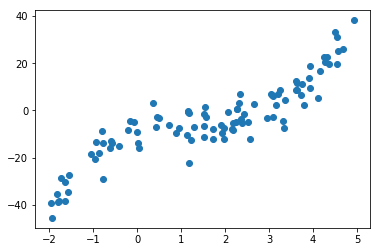

In [3]:
# 3차항식 데이터
poly = lambda x:x**3-4*x**2+6*x-9
ll, ul = -2, 5 # lower and upper limit
ndata = 100
x_data = (ul - ll) * np.random.random(ndata) + ll
x_data.sort()
y_data = poly(x_data) + np.random.normal(0,5,ndata)
plt.scatter(x_data,y_data)

In [4]:
# 텐서플로를 이용한 회귀모델
# 모델 : w0 + w1x + w2x^2 + w3x^3 = 0
tf.reset_default_graph()

x_train = np.vstack([x_data**3, x_data**2, x_data, np.ones(x_data.shape)]).T
y_train = np.reshape(y_data, (ndata,1))

w = tf.Variable(tf.random_uniform([4,1], -1.0, 1.0))
X = tf.placeholder(tf.float32, shape=(None, 4))
Y = tf.placeholder(tf.float32, shape=(None, 1))

result = tf.matmul(X,w)

Loss = tf.reduce_mean(tf.square(result-Y))
Optimizer = tf.train.GradientDescentOptimizer(learning_rate=1e-4).minimize(Loss)

In [5]:
# 세션을 실행합니다.
sess = tf.Session()
sess.run(tf.global_variables_initializer())

TypeError: must be str, not numpy.float32

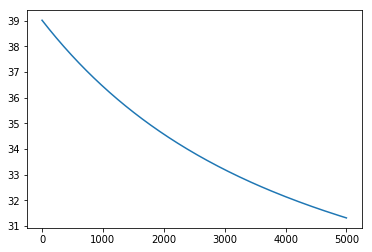

In [8]:
loss_table = []

# 최적화를 1000번 수행합니다.
for i in range(7000):
    _, loss = sess.run([Optimizer, Loss], feed_dict={X: x_train, Y: y_train})
    loss_table.append(loss)

# Loss 결과를 그래프로 출력합니다.
plt.plot(loss_table)
print('Final Loss : ', loss_table[-1])

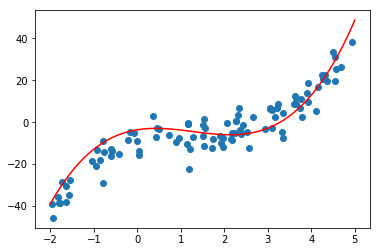

In [7]:
w_result = sess.run(w)
estim_poly = lambda x : w_result[0][0]*x**3 + w_result[1][0]*x**2 + w_result[2][0]*x + w_result[3][0]
x_ax = np.linspace(ll, ul, ndata)
y_ax = estim_poly(x_ax)
plt.scatter(x_data, y_data)
plt.plot(x_ax, y_ax, 'r')